In [1]:
import boto3
import botocore
import sagemaker
import sys


bucket = 'sciforma-performance-data'   # <--- specify a bucket you have access to
prefix = 'sagemaker/rcf-benchmarks'
execution_role = sagemaker.get_execution_role()


# check if the bucket exists
try:
    boto3.Session().client('s3').head_bucket(Bucket=bucket)
except botocore.exceptions.ParamValidationError as e:
    print('Hey! You either forgot to specify your S3 bucket'
          ' or you gave your bucket an invalid name!')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == '403':
        print("Hey! You don't have permission to access the bucket, {}.".format(bucket))
    elif e.response['Error']['Code'] == '404':
        print("Hey! Your bucket, {}, doesn't exist!".format(bucket))
    else:
        raise
else:
    print('Training input/output will be stored in: s3://{}/{}'.format(bucket, prefix))


import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()
data_key = 'performanceDataWithRole_Loc_mag_team_allocation.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

performanceData = pd.read_csv(data_location)

performanceData.head()

Training input/output will be stored in: s3://sciforma-performance-data/sagemaker/rcf-benchmarks


,Unnamed: 0,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE
0,0,2019-03-05 11:40:51,1488,59786,x84sljJzv,Team Allocation,,Exception,0,B33046,HPMS.AMP,IN-NDA02,_PM+RM,RNG
1,1,2019-03-05 11:57:57,505,3265232,x84sljJzv,Team Allocation,,Exception,1,NXP87683,HPMS.STI,DE-MUC02,_Resource Manager,RC9
2,2,2019-03-05 12:08:48,1553,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86
3,3,2019-03-05 12:10:52,1683,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86
4,4,2019-03-05 12:11:40,4397,8678907,x84sljJzv,Team Allocation,,Exception,1,ATP02132,HPMS.STI,AT-GRK01-s1,_PM+RM,RC9


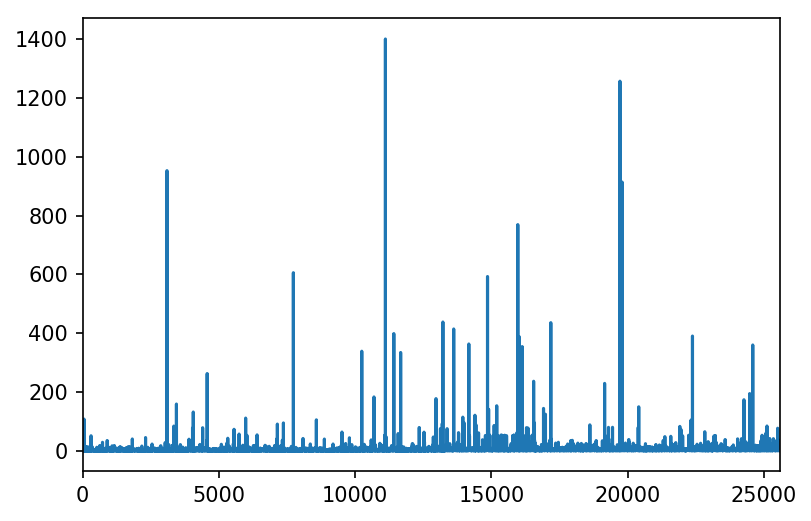

In [2]:
# convert to seconds from milliseconds and kick out anything above 1500 seconds
performanceData['ELAPSED'] = performanceData['ELAPSED'].div(1000) 

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 150


badData = performanceData.drop(performanceData[performanceData['ELAPSED']>1500].index, inplace=True)
performanceData['ELAPSED'].plot()

In [7]:

performanceData.drop(columns='Unnamed: 0', inplace=True)
#performanceData.dropna(inplace = True)
performanceData.head()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE
0,2019-03-05 11:40:51,1.488,59786,x84sljJzv,Team Allocation,,Exception,0,B33046,HPMS.AMP,IN-NDA02,_PM+RM,RNG
1,2019-03-05 11:57:57,0.505,3265232,x84sljJzv,Team Allocation,,Exception,1,NXP87683,HPMS.STI,DE-MUC02,_Resource Manager,RC9
2,2019-03-05 12:08:48,1.553,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86
3,2019-03-05 12:10:52,1.683,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86
4,2019-03-05 12:11:40,4.397,8678907,x84sljJzv,Team Allocation,,Exception,1,ATP02132,HPMS.STI,AT-GRK01-s1,_PM+RM,RC9


In [12]:
performanceData.tail()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized
25592,2019-11-11 09:47:57,3.174,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000673
25593,2019-11-11 09:49:11,1.439,3265138,x84sljJzv,Team Allocation,,Exception,1,NXP37887,HPMS.STI,AT-GRK01-s1,_PMO+RM,RC9,0.000634
25594,2019-11-11 09:53:42,1.325,8925514,x84sljJzv,Team Allocation,,Exception,1,NXP29574,HPMS.OPS,AT-GRK01-s1,_Resource Manager,RC9,NaN
25595,2019-11-11 09:55:21,1.298,8699600,x84sljJzv,Team Allocation,,Exception,1,NXA33177,HPMS.CBS,IN-BLR01-s1,_PM+RM,R88,NaN
25596,2019-11-11 09:55:24,1.244,8925514,x84sljJzv,Team Allocation,,Exception,1,NXP29574,HPMS.OPS,AT-GRK01-s1,_Resource Manager,RC9,NaN


In [14]:
performanceData.tail()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized
25589,2019-11-11 09:44:32,3.344,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.002013
25590,2019-11-11 09:45:47,3.247,257138781,x84sljJzv,Team Allocation,,Exception,0,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000774
25591,2019-11-11 09:47:08,3.444,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000692
25592,2019-11-11 09:47:57,3.174,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000673
25593,2019-11-11 09:49:11,1.439,3265138,x84sljJzv,Team Allocation,,Exception,1,NXP37887,HPMS.STI,AT-GRK01-s1,_PMO+RM,RC9,0.000634


In [66]:
performanceData.tail()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized,score
25589,2019-11-11 09:44:32,3.344,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.002013,0.798595
25590,2019-11-11 09:45:47,3.247,257138781,x84sljJzv,Team Allocation,,Exception,0,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000774,0.651087
25591,2019-11-11 09:47:08,3.444,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000692,0.669394
25592,2019-11-11 09:47:57,3.174,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000673,0.682068
25593,2019-11-11 09:49:11,1.439,3265138,x84sljJzv,Team Allocation,,Exception,1,NXP37887,HPMS.STI,AT-GRK01-s1,_PMO+RM,RC9,0.000634,0.689290


In [67]:
normalBehaviorTeamAlloc.tail()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized,score
25589,2019-11-11 09:44:32,3.344,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.002013,0.798595
25590,2019-11-11 09:45:47,3.247,257138781,x84sljJzv,Team Allocation,,Exception,0,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000774,0.651087
25591,2019-11-11 09:47:08,3.444,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000692,0.669394
25592,2019-11-11 09:47:57,3.174,257138781,x84sljJzv,Team Allocation,,Exception,1,deepika_ro,The Support IT.A Support PMO,NaN,_Core Team User,NaN,0.000673,0.682068
25593,2019-11-11 09:49:11,1.439,3265138,x84sljJzv,Team Allocation,,Exception,1,NXP37887,HPMS.STI,AT-GRK01-s1,_PMO+RM,RC9,0.000634,0.689290


In [9]:
# 
from sklearn import preprocessing


#performanceData.loc[145623,'ELAPSED']=25000
#performanceData.loc[83349,'ELAPSED']=25000
# keep a copy of non normalized data
performanceDataOrig =performanceData
#performanceData['ELAPSED'] = performanceData['ELAPSED'].clip(0,6000)

#performanceData.plot()
#normalized_df=(performanceData-performanceData.mean())/performanceData.std()
x = performanceData[['ELAPSED']].values
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
performanceData['ELAPSED_normalized'] = pd.DataFrame(x_scaled)
performanceData.head()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized
0,2019-03-05 11:40:51,1.488,59786,x84sljJzv,Team Allocation,,Exception,0,B33046,HPMS.AMP,IN-NDA02,_PM+RM,RNG,0.000809
1,2019-03-05 11:57:57,0.505,3265232,x84sljJzv,Team Allocation,,Exception,1,NXP87683,HPMS.STI,DE-MUC02,_Resource Manager,RC9,0.000106
2,2019-03-05 12:08:48,1.553,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86,0.000855
3,2019-03-05 12:10:52,1.683,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86,0.000948
4,2019-03-05 12:11:40,4.397,8678907,x84sljJzv,Team Allocation,,Exception,1,ATP02132,HPMS.STI,AT-GRK01-s1,_PM+RM,RC9,0.002887


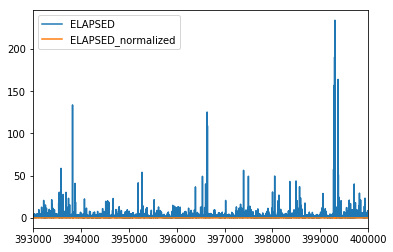

In [13]:
#performanceData.describe()
nans = lambda df: df[df.isnull().any(axis=1)]
#performanceData[392991:400000].plot()

In [13]:
performanceData.dropna(subset=['ELAPSED_normalized'],inplace = True)
performanceData['ELAPSED_normalized'].isnull().sum()

0

In [19]:
#plt.plot(performanceData['ELAPSED_normalized'])
#performanceData.values[1,:]
print(performanceData.ELAPSED_normalized.values.reshape(-1,1))

[[0.0014538 ]
 [0.00110386]
 [0.00290085]
 ...
 [0.0004891 ]
 [0.00111602]
 [0.00107887]]


In [15]:
from sagemaker import RandomCutForest
#We create a new training job and and inference endpoint. 
session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.m4.xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=100,
                      num_trees=400)

# automatically upload the training data to S3 and run the training job
#rcf.fit(rcf.record_set(performanceData))
rcf.fit(rcf.record_set(performanceData.ELAPSED_normalized.values.reshape(-1,1)))

2019-11-13 06:33:01 Starting - Starting the training job...
2019-11-13 06:33:04 Starting - Launching requested ML instances......
2019-11-13 06:34:06 Starting - Preparing the instances for training......
2019-11-13 06:35:25 Downloading - Downloading input data...
2019-11-13 06:36:00 Training - Downloading the training image...
2019-11-13 06:36:31 Uploading - Uploading generated training model
2019-11-13 06:36:31 Completed - Training job completed
Docker entrypoint called with argument(s): train
/opt/amazon/lib/python2.7/site-packages/scipy/_lib/_numpy_compat.py:10: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated, import from numpy.testing instead.
  from numpy.testing.nosetester import import_nose
/opt/amazon/lib/python2.7/site-packages/scipy/stats/morestats.py:12: DeprecationWarning: Importing from numpy.testing.decorators is deprecated, import from numpy.testing instead.
  from numpy.testing.decorators import setastest
[11/13/2019 06:36:22 INFO 1396782483474

In [16]:
rcf_inference = rcf.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
)

from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

--------------------------------------------------------------------------------------------------------------!

In [17]:
len(performanceData)

25591

In [ ]:
# run this when a loop is required for result set
import numpy as np
allScore = np.array([]);

start = 0
end = 133330
oneEpRequest = 133330 
for n in range(int(len(performanceData)/oneEpRequest)):
    performanceData_numpy = performanceData[start:end].ELAPSED_normalized.values.reshape(-1,1)
    print("Start and end",start, end)
    results = rcf_inference.predict(performanceData_numpy)
    scores = np.array([datum['score'] for datum in results['scores']])
    print("count all score",len(allScore))
    print("count perf array",len( performanceData[start:end].ELAPSED_normalized.values.reshape(-1,1)))
    allScore = np.append(allScore, scores)
    start = end
    end = end+oneEpRequest
   # if (start >= 150000):
   #     break

In [ ]:

#print(len(allScore))
#performanceData.drop(['399995' , '399994'], inplace = True)
print(performanceData)

In [18]:
#run this when a single request is required for inference

performanceData_numpy = performanceData.ELAPSED_normalized.values.reshape(-1,1)
results = rcf_inference.predict(performanceData_numpy)
scores = [datum['score'] for datum in results['scores']]

# add scores to performanceData_numpy frame and print first few values
performanceData['score'] = pd.Series(scores, index=performanceData.index)
performanceData.head()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized,score
0,2019-03-05 11:40:51,1.488,59786,x84sljJzv,Team Allocation,,Exception,0,B33046,HPMS.AMP,IN-NDA02,_PM+RM,RNG,0.000809,0.643326
1,2019-03-05 11:57:57,0.505,3265232,x84sljJzv,Team Allocation,,Exception,1,NXP87683,HPMS.STI,DE-MUC02,_Resource Manager,RC9,0.000106,1.234579
2,2019-03-05 12:08:48,1.553,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86,0.000855,0.650406
3,2019-03-05 12:10:52,1.683,8713928,x84sljJzv,Team Allocation,,Exception,1,NXP72191,T&O.TO-FO,NL-NYM01-s1,_Resource Manager,R86,0.000948,0.643311
4,2019-03-05 12:11:40,4.397,8678907,x84sljJzv,Team Allocation,,Exception,1,ATP02132,HPMS.STI,AT-GRK01-s1,_PM+RM,RC9,0.002887,0.925651


In [153]:
#performanceData_numpy = performanceData.ELAPSED.values.reshape(-1,1)
#print(len(performanceData_numpy))
#results = rcf_inference.predict(performanceData_numpy[:6])


#results = rcf_inference.predict(performanceData)
#scores = np.array([datum['score'] for datum in results['scores']])

#scores = allScore
# compute the shingled score distribution and cutoff and determine anomalous scores
score_mean = performanceData['score'].mean()
score_std = performanceData['score'].std()
score_cutoff = score_mean + 3*score_std

anomalies = performanceData[performanceData['score'] > score_cutoff]
#anomaly_indices = np.arange(len(scores))[performanceData['score'] > score_cutoff]

len(anomalies)

536

In [54]:
anomalies.ELAPSED.describe()


count    536.000000
mean       7.403013
std       42.623117
min        0.427000
25%        1.520250
50%        2.291500
75%        4.354000
max      952.667000
Name: ELAPSED, dtype: float64

In [20]:
#results = rcf_inference.predict(performanceData_numpy[:300000])
#scores = [datum['score'] for datum in results['scores']]
#performanceData = performanceData.truncate(after=399991 , inplace = True)
# add scores to performance data frame and print first few values

performanceData['score'] = pd.Series(allScore, index=performanceData.index)
performanceData.head()

,STARTDATE,ELAPSED,ELAPSED_normalized,score
0,2019-03-05 11:31:45,1.701,0.001454,0.638585
1,2019-03-05 11:32:08,1.183,0.001104,0.640880
2,2019-03-05 11:32:16,3.843,0.002901,0.885822
3,2019-03-05 11:33:06,3.674,0.002787,0.857824
4,2019-03-05 11:33:21,13.951,0.009729,2.397002


In [ ]:
anomalies

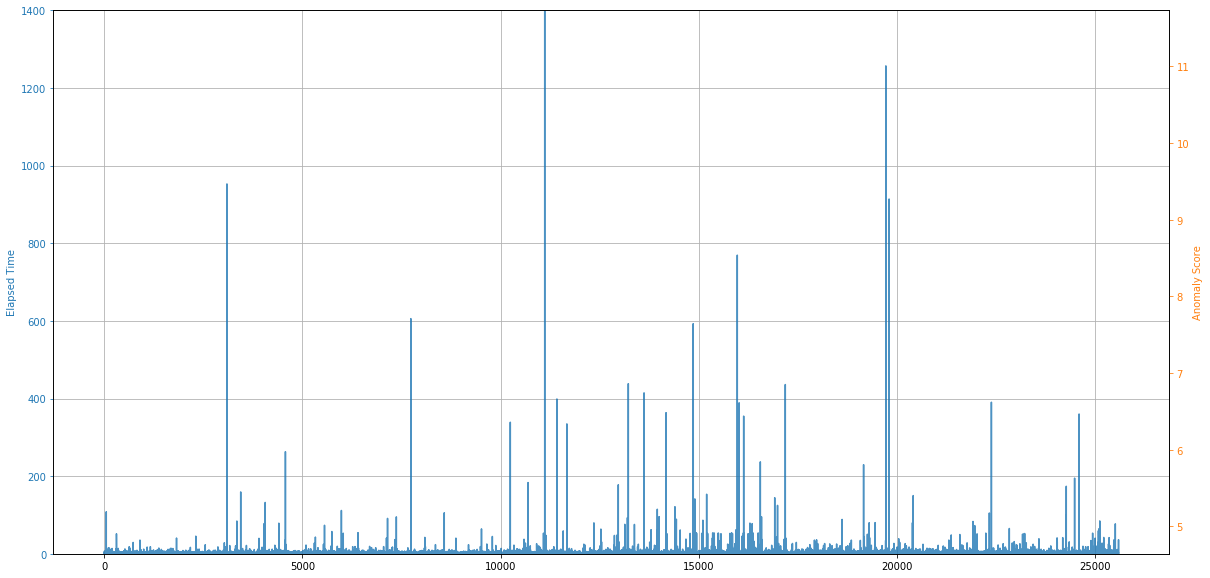

In [160]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#
# *Try this out* - change `start` and `end` to zoom in on the 
# anomaly found earlier in this notebook
start, end = 0, len(performanceData)
#start, end = 10000, 10050
performance_data_subset = performanceData[start:end]

ax1.plot(performance_data_subset['ELAPSED'], color='C0', alpha=0.8)
#ax2.plot(performance_data_subset['score'], color='C1')

ax1.grid(which='major', axis='both')

ax1.set_ylabel('Elapsed Time', color='C0')
ax2.set_ylabel('Anomaly Score', color='C1')

ax1.tick_params('y', colors='C0')
ax2.tick_params('y', colors='C1')

ax1.set_ylim(0, performance_data_subset['ELAPSED'].max())
ax2.set_ylim(min(scores)+4, 2*max(scores))
fig.set_figwidth(20)
fig.set_figheight(10)
#ax2.plot(anomalies.index, anomalies.score, 'ko')


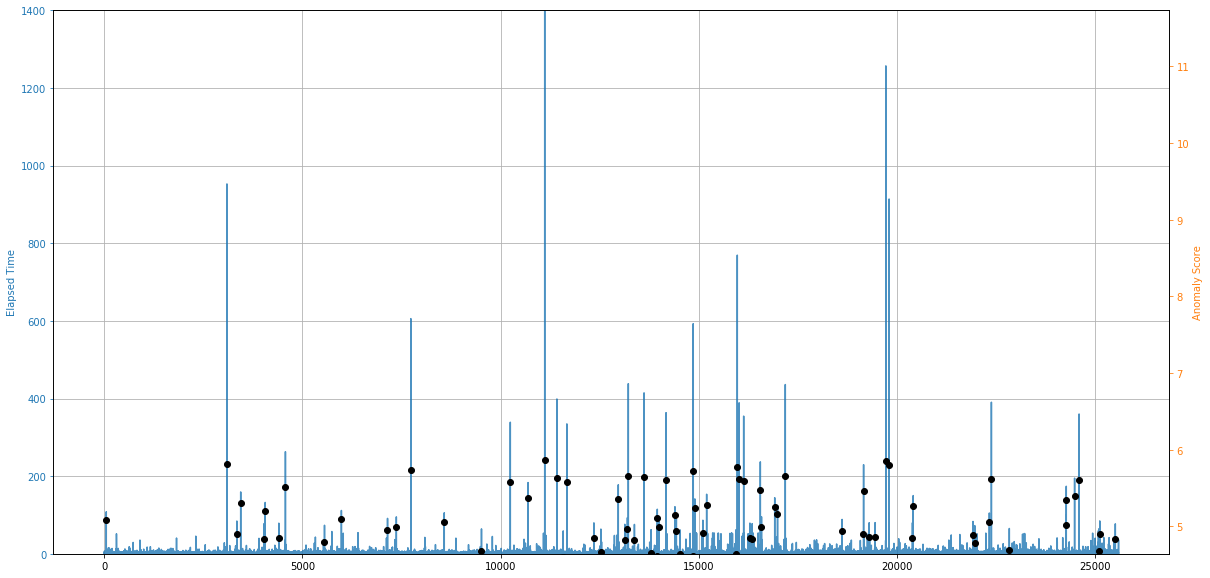

In [161]:
score_mean = performanceData['score'].mean()
score_std = performanceData['score'].std()
score_cutoff = score_mean + 3*score_std

anomalies = performance_data_subset[performance_data_subset['score'] > score_cutoff]
#len(anomalies)

ax2.plot(anomalies.index, anomalies.score, 'ko')
fig

In [168]:
anomalies[100:]

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,LOCATION,USER_ROLE,MAG_CODE,ELAPSED_normalized,score
7827,2019-05-22 12:36:48,6.298,8559777,x84sljJzv,Team Allocation,,Exception,1,USB06090,HPMS.IDA,NL-NYM01-s1,_Resource Manager,RG4,0.008355,2.389645
8075,2019-05-26 12:00:18,3.315,10782842,x84sljJzv,Team Allocation,,Exception,1,NXF28689,HPMS.AMP,IN-NDA02,_PM+RM,RNG,0.010328,2.780154
8087,2019-05-27 06:06:36,1.008,3261824,x84sljJzv,Team Allocation,,Exception,1,ATP50549,HPMS.STI,AT-GRK01-s1,_PMO+RM,RC9,0.030014,4.266640
8101,2019-05-27 07:34:14,1.757,8935706,x84sljJzv,Team Allocation,,Exception,1,NXA02264,HPMS.SIP,BE-LEU01-s1,_PMO+RM,RM5,0.013043,3.145499
8355,2019-05-28 18:38:06,1.784,9622556,x84sljJzv,Team Allocation,,Exception,1,R20110,T&O.TO-FO,US-AUS02,_PMO+RM,RAT,0.016641,3.523254
8577,2019-05-30 21:25:17,1.173,59568,x84sljJzv,Team Allocation,,Exception,1,RFVP50,HPMS.DN,US-AUS01,_PMO+RM,RNG,0.075222,5.058200
8702,2019-06-03 08:13:18,0.825,8688137,x84sljJzv,Team Allocation,,Exception,1,DEP11234,CORP.SSC-HRM,DE-HBG02,<No Rights>,RZ8,0.007906,2.290131
8871,2019-06-04 09:37:39,1.428,13417882,x84sljJzv,Team Allocation,,Exception,1,NXF31779,HPMS.STI,IN-BLR01-s1,_PM+RM,RC9,0.028587,4.212943
9189,2019-06-07 11:52:17,1.456,8925514,x84sljJzv,Team Allocation,,Exception,1,NXP29574,HPMS.OPS,AT-GRK01-s1,_Resource Manager,RC9,0.016552,3.515107
9406,2019-06-11 07:57:36,1.144,3262112,x84sljJzv,Team Allocation,,Exception,1,NXP84335,HPMS.STI,DE-MUC02,_PM+RM,RC9,0.007896,2.288386


In [147]:


normalBehaviorTeamAlloc = performanceData.drop(anomalies.index.values)



In [143]:
normalBehaviorTeamAlloc['score'].describe()

count    25055.000000
mean         0.809817
std          0.233658
min          0.641296
25%          0.673134
50%          0.724975
75%          0.838695
max          2.260195
Name: score, dtype: float64

In [159]:
anomalies.index.values

array([10013])

In [106]:
performanceData.describe()

,ELAPSED,USERID,TRANSACTIONTYPE,ELAPSED_normalized,score
count,25591.000000,2.559100e+04,25591.000000,25591.000000,25591.000000
mean,3.450763,1.735630e+07,0.821851,0.002211,0.865221
std,18.981486,5.008103e+07,0.382645,0.013560,0.465019
min,0.356000,2.084900e+04,0.000000,0.000000,0.641296
25%,1.277000,6.205100e+04,1.000000,0.000658,0.674160
50%,1.900000,8.556620e+06,1.000000,0.001103,0.730401
75%,3.139000,8.925649e+06,1.000000,0.001988,0.853886
max,1400.137000,2.916461e+08,1.000000,1.000000,5.866686


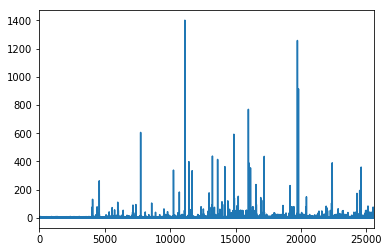

In [148]:
normalBehaviorTeamAlloc['ELAPSED'].plot()

In [31]:

doc = anomalies.to_csv('anomalies_team_allocation.csv') # your local file

data_key = 'anomalies.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
boto3.Session().resource('s3').Bucket(bucket).Object(data_key).upload_file('anomalies_team_allocation.csv')




In [32]:

sagemaker.Session().delete_endpoint(rcf_inference.endpoint)


In [ ]:
anomalies.head(20)

In [46]:
performanceData.groupby(['LOCATION']).count()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,USER_ROLE,MAG_CODE,ELAPSED_normalized,score
LOCATION,,,,,,,,,,,,,,
AT-GRK01-s1,4382,4382,4382,4382,4382,4382,4382,4382,4382,4382,4382,4382,4382,4382
BE-LEU01-s1,413,413,413,413,413,413,413,413,413,413,413,413,413,413
BR-CPQ01,115,115,115,115,115,115,115,115,115,115,115,115,115,115
CA-KAN01,127,127,127,127,127,127,127,127,127,127,127,127,127,127
CN-BJS01,119,119,119,119,119,119,119,119,119,119,119,119,119,119
CN-CQI02,35,35,35,35,35,35,35,35,35,35,35,35,35,35
CN-SHA01-s1,134,134,134,134,134,134,134,134,134,134,134,134,134,134
CN-SHA02,294,294,294,294,294,294,294,294,294,294,294,294,294,294
CN-SZH02,423,423,423,423,423,423,423,423,423,423,423,423,423,423


In [45]:
anomalies.groupby(['LOCATION']).count()

,STARTDATE,ELAPSED,USERID,EVENTID,EVENT_DESC,WORKSPACEID,WS_DESC,TRANSACTIONTYPE,CORE_ID,HR_ORGANIZATION,USER_ROLE,MAG_CODE,ELAPSED_normalized,score
LOCATION,,,,,,,,,,,,,,
AT-GRK01-s1,96,96,96,96,96,96,96,96,96,96,96,96,96,96
BE-LEU01-s1,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BR-CPQ01,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CA-KAN01,3,3,3,3,3,3,3,3,3,3,3,3,3,3
CN-BJS01,3,3,3,3,3,3,3,3,3,3,3,3,3,3
CN-SHA01-s1,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CN-SHA02,12,12,12,12,12,12,12,12,12,12,12,12,12,12
CN-SZH02,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CN-TNJ02,1,1,1,1,1,1,1,1,1,1,1,1,1,1
